In [226]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix
from sympy.solvers import solve
from sympy import Symbol
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn import model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image

In [227]:
dataset = pd.read_csv('./winequality-red.csv')

In [228]:
dataset.head(50)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [229]:
dataset.columns = ['fixed', 'volatile', 'citric', 'residual', 'chlorides', 'free', 'total', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
dataset.columns

Index(['fixed', 'volatile', 'citric', 'residual', 'chlorides', 'free', 'total',
       'density', 'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [230]:
le = LabelEncoder()

In [231]:
dataset.fixed = le.fit_transform(dataset.fixed)
dataset.volatile = le.fit_transform(dataset.volatile)
dataset.citric = le.fit_transform(dataset.citric)
dataset.residual = le.fit_transform(dataset.residual)
dataset.chlorides = le.fit_transform(dataset.chlorides)
dataset.free = le.fit_transform(dataset.free)
dataset.total = le.fit_transform(dataset.total)
dataset.density = le.fit_transform(dataset.density)
dataset.pH = le.fit_transform(dataset.pH)
dataset.sulphates = le.fit_transform(dataset.sulphates)
dataset.alcohol = le.fit_transform(dataset.alcohol)
dataset.quality = le.fit_transform(dataset.quality)


In [232]:
dataset

,fixed,volatile,citric,residual,chlorides,free,total,density,pH,sulphates,alcohol,quality
0,27,76,0,10,39,11,28,342,63,18,11,2
1,31,112,0,22,61,25,61,271,32,30,17,2
2,31,88,4,17,55,15,48,287,38,27,17,2
3,65,12,56,10,38,17,54,354,28,20,17,3
4,27,76,0,10,39,11,28,342,63,18,11,2
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,15,56,8,11,53,32,38,119,57,20,26,2
1595,12,47,10,15,25,40,45,135,64,38,36,3
1596,16,42,13,17,39,29,34,185,54,37,33,3
1597,12,65,12,11,38,32,38,164,69,33,23,2


In [233]:
dataset.describe()

,fixed,volatile,citric,residual,chlorides,free,total,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,36.121951,48.056285,27.083177,18.889931,46.052533,15.759850,40.115072,254.487805,43.055034,27.538462,24.682927,2.636023
std,17.134768,27.699362,19.434688,15.001932,23.310195,10.571462,31.389543,109.518155,15.023493,15.372337,13.610537,0.807569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.000000,27.000000,9.000000,10.000000,33.000000,7.000000,16.000000,175.000000,33.000000,17.000000,12.000000,2.000000
50%,32.000000,43.000000,26.000000,15.000000,42.000000,14.000000,32.000000,267.000000,43.000000,24.000000,23.000000,3.000000
75%,45.000000,64.000000,42.000000,22.000000,53.000000,21.000000,56.000000,344.500000,52.000000,35.000000,35.000000,3.000000
max,95.000000,142.000000,79.000000,90.000000,152.000000,59.000000,143.000000,435.000000,88.000000,95.000000,64.000000,5.000000


In [234]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   fixed      1599 non-null   int64
 1   volatile   1599 non-null   int64
 2   citric     1599 non-null   int64
 3   residual   1599 non-null   int64
 4   chlorides  1599 non-null   int64
 5   free       1599 non-null   int64
 6   total      1599 non-null   int64
 7   density    1599 non-null   int64
 8   pH         1599 non-null   int64
 9   sulphates  1599 non-null   int64
 10  alcohol    1599 non-null   int64
 11  quality    1599 non-null   int64
dtypes: int64(12)
memory usage: 150.0 KB


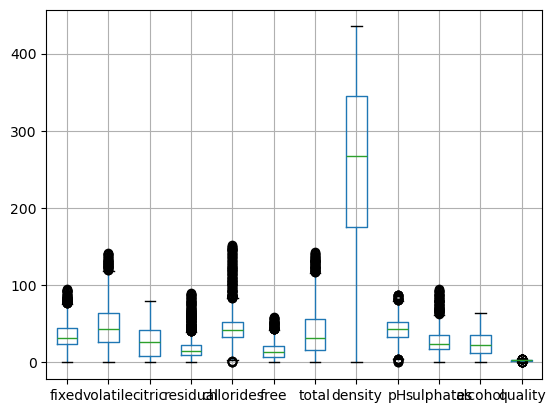

In [235]:
dataset.boxplot(column=['fixed', 'volatile', 'citric', 'residual', 'chlorides', 'free', 'total', 'density', 'pH', 'sulphates', 'alcohol', 'quality'])
plt.show()

In [236]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [237]:
classifier = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4, random_state = 0)
classifier.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=0)

In [238]:
Y_pred = classifier.predict(X_test)

In [239]:
Y_pred

array([3, 2, 4, 2, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 2, 3, 4, 2, 3, 2, 3, 2,
       2, 4, 2, 2, 2, 4, 2, 3, 3, 3, 3, 2, 3, 4, 2, 2, 4, 3, 2, 3, 3, 3,
       3, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 4, 2, 2, 2, 3, 3, 2, 3,
       2, 3, 4, 4, 2, 3, 2, 2, 2, 3, 2, 2, 2, 4, 2, 2, 3, 3, 2, 2, 4, 2,
       2, 2, 2, 2, 3, 2, 4, 2, 4, 2, 2, 3, 4, 4, 3, 3, 3, 2, 3, 2, 3, 2,
       3, 2, 4, 2, 3, 2, 2, 4, 3, 2, 2, 2, 2, 2, 3, 4, 2, 2, 3, 4, 3, 2,
       3, 3, 3, 2, 2, 2, 3, 2, 3, 2, 2, 2, 2, 2, 4, 4, 3, 2, 3, 4, 2, 2,
       2, 3, 2, 2, 3, 2, 3, 2, 4, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 4, 4, 3,
       4, 4, 3, 2, 2, 4, 2, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 2, 2, 3, 4, 2, 2,
       2, 4, 3, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 4, 3, 3, 2, 2,
       2, 2, 4, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2,
       2, 2, 4, 2, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 3,

In [240]:
Y_test

array([3, 2, 4, 3, 2, 3, 2, 3, 1, 2, 2, 2, 3, 2, 3, 3, 4, 2, 2, 1, 4, 3,
       3, 1, 3, 2, 2, 4, 2, 3, 2, 3, 2, 3, 4, 4, 2, 3, 3, 4, 2, 4, 3, 3,
       2, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 3, 3, 3, 2, 3,
       2, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 2,
       2, 2, 2, 3, 1, 2, 4, 3, 3, 2, 3, 2, 5, 3, 3, 3, 2, 2, 2, 2, 4, 2,
       3, 2, 4, 2, 3, 3, 3, 4, 3, 3, 2, 4, 2, 2, 3, 3, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 2, 5, 2, 3, 2, 3, 2, 1, 3, 4, 3, 2, 3, 3, 2, 2, 2,
       3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 2, 2, 2, 5, 2, 3,
       3, 4, 4, 2, 2, 4, 2, 3, 3, 1, 2, 3, 2, 2, 3, 2, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 3, 3, 2, 3, 3, 2, 3, 4, 3, 3, 3, 2, 2, 2, 3, 2, 3, 3, 2,
       2, 2, 3, 3, 2, 3, 3, 3, 0, 3, 2, 2, 4, 3, 4, 3, 3, 4, 4, 3, 2, 3,
       2, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 3, 4, 2, 3, 2, 3,
       2, 1, 2, 2, 3, 4, 3, 2, 2, 1, 2, 3, 4, 3, 3, 4, 2, 4, 2, 3, 3, 2,
       2, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3,

In [241]:
cm = confusion_matrix(Y_test, Y_pred)
cm

array([[  0,   0,   2,   0,   0,   0],
       [  0,   0,  10,   3,   1,   0],
       [  0,   0, 132,  32,   5,   0],
       [  0,   1,  69,  82,  18,   0],
       [  0,   0,   5,  19,  16,   0],
       [  0,   0,   0,   3,   2,   0]], dtype=int64)

In [242]:
print("Accuracy: ", metrics.accuracy_score(Y_test, Y_pred))
print("F1 Score: ", metrics.f1_score(Y_test, Y_pred, average = 'weighted'))
print("Recall: ", metrics.recall_score(Y_test, Y_pred, average = 'weighted'))

Accuracy:  0.575
F1 Score:  0.5528077875495395
Recall:  0.575


In [243]:
tree.export_graphviz(classifier, out_file = 'tree_social.dot')

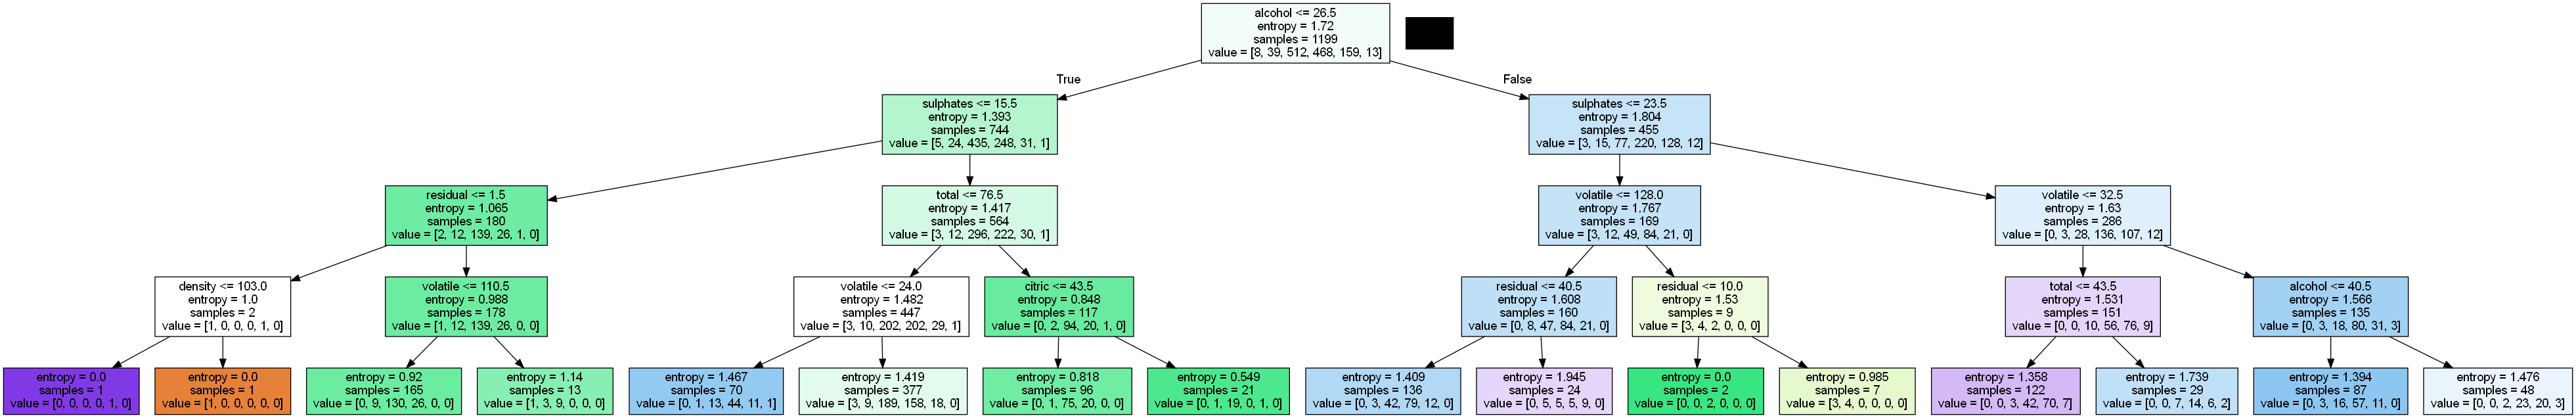

In [244]:
import pydotplus
dot_data = tree.export_graphviz(classifier,
                                out_file=None,
                                feature_names=list(dataset.drop(['quality'], axis=1)),
                                filled=True)

# Crie o gráfico a partir do dot_data
graph = pydotplus.graph_from_dot_data(dot_data)

# Exiba o gráfico
Image(graph.create_png())